Adding Libraries

In [6]:
import pandas as pd
import numpy as np


Getting the Data frame ready:

In [7]:
drivers_2019 = pd.read_csv("Data/2019_drivers.csv")
drivers_2020 = pd.read_csv("Data/2020_drivers.csv")
drivers_2021 = pd.read_csv("Data/2021_drivers.csv")
drivers_2022 = pd.read_csv("Data/2022_drivers.csv")
drivers_2023 = pd.read_csv("Data/2023_drivers.csv")
drivers_2024 = pd.read_csv("Data/2024_drivers.csv")

all_drivers = pd.concat([drivers_2019, drivers_2020, drivers_2021, drivers_2022, drivers_2023, drivers_2024], axis = 0)

all_drivers
all_drivers.drop(columns=["Driver", "Highest Race Finish",  "Date of Birth", "Place of Birth", "Abbreviation"],inplace = True)
all_drivers


all_drivers["Number"] = all_drivers["Number"].fillna(all_drivers["No"])
all_drivers
all_drivers.drop(columns=["No"],inplace = True)


all_drivers["Podium Percentage"] = all_drivers["Podiums"] / all_drivers["Grands Prix Entered"]
all_drivers.head(n = 60)

all_drivers["Has WC"] = np.where(all_drivers["World Championships"] > 0, 1, 0)
all_drivers.head(n = 60)

,Number,Team,Country,Podiums,Points,Grands Prix Entered,World Championships,Highest Grid Position,Podium Percentage,Has WC
0,44.0,Mercedes,United Kingdom,151,3431.0,250,6,1,0.604000,1
1,77.0,Mercedes,Finland,45,1289.0,140,0,1,0.321429,0
2,33.0,Red Bull Racing,Netherlands,31,948.0,102,0,1,0.303922,0
3,16.0,Ferrari,Monaco,10,303.0,42,0,1,0.238095,0
4,5.0,Ferrari,Germany,120,2985.0,241,4,1,0.497925,1
5,55.0,McLaren,Spain,1,267.0,102,0,5,0.009804,0
6,10.0,Toro Rosso,France,1,124.0,47,0,4,0.021277,0
7,23.0,Red Bull Racing,Thailand,0,92.0,21,0,5,0.000000,0
8,3.0,Renault,Australia,29,1040.0,171,0,1,0.169591,0
9,11.0,Racing Point,Mexico,8,581.0,178,0,4,0.044944,0


In [9]:
raceRes19 = pd.read_csv("Data/2019_raceResults.csv")
raceRes19["Year"] = 2019
raceRes20 = pd.read_csv("Data/2020_raceResults.csv")
raceRes20["Year"] = 2020
raceRes21 = pd.read_csv("Data/2021_raceResults.csv")
raceRes21["Year"] = 2021
raceRes22 = pd.read_csv("Data/2022_raceResults.csv")
raceRes22["Year"] = 2022
raceRes23 = pd.read_csv("Data/2023_raceResults.csv")
raceRes23["Year"] = 2023
raceRes24 = pd.read_csv("Data/2024_raceResults.csv")
raceRes24["Year"] = 2024



all_races = pd.concat([raceRes19, raceRes20, raceRes21, raceRes22, raceRes23, raceRes24], axis = 0)

all_races


#need to merge total time/gap with time/req & need to merge fastest lap with set fastest lap
# all_drivers["Number"] = all_drivers["Number"].fillna(all_drivers["No"])

all_races["Time/Retired"] = all_races["Time/Retired"].fillna(all_races["Total Time/Gap/Retirement"])
all_races["Fastest Lap"] = all_races["Fastest Lap"].fillna(all_races["Set Fastest Lap"])

#all_drivers.drop(columns=["Driver", "Highest Race Finish",  "Date of Birth", "Place of Birth", "Abbreviation"],inplace = True)
all_races.drop(columns = ["Driver", "Laps", "Total Time/Gap/Retirement", "Set Fastest Lap", "+1 Pt", "Fastest Lap Time"], inplace = True)

all_races = all_races[(all_races["Position"] != "DQ") & (all_races["Position"] != "NC")]
all_races = all_races.dropna()

all_races["Position"] = all_races["Position"].astype(int)
all_races["Starting Grid"] = all_races["Starting Grid"].astype(int)

all_races["Net Position"] = all_races["Starting Grid"] - all_races["Position"]
all_races.head(n = 60)


,Track,Position,No,Team,Starting Grid,Points,Fastest Lap,Year,Time/Retired,Net Position
0,Australia,1,77,Mercedes,2,26.0,Yes,2019,1:25:27.325,1
1,Australia,2,44,Mercedes,1,18.0,No,2019,+20.886,-1
2,Australia,3,33,Red Bull Racing Honda,4,15.0,No,2019,+22.520,1
3,Australia,4,5,Ferrari,3,12.0,No,2019,+57.109,-1
4,Australia,5,16,Ferrari,5,10.0,No,2019,+58.230,0
5,Australia,6,20,Haas Ferrari,7,8.0,No,2019,+87.156,1
6,Australia,7,27,Renault,11,6.0,No,2019,+1 lap,4
7,Australia,8,7,Alfa Romeo Racing Ferrari,9,4.0,No,2019,+1 lap,1
8,Australia,9,18,Racing Point BWT Mercedes,16,2.0,No,2019,+1 lap,7
9,Australia,10,26,Scuderia Toro Rosso Honda,15,1.0,No,2019,+1 lap,5


In [10]:
import re


def time_to_seconds(time_str):
    """Convert race time formats to absolute seconds."""
    if isinstance(time_str, str):
        if re.match(r'^\d{1,2}:\d{2}:\d{2}\.\d{3}$', time_str):  # hh:mm:ss.sss
            h, m, s = map(float, time_str.split(':'))
            return h * 3600 + m * 60 + s
        elif re.match(r'^\d{1,2}:\d{2}\.\d{3}$', time_str):  # mm:ss.sss
            m, s = map(float, time_str.split(':'))
            return m * 60 + s
    return None  # If not a valid time format, return None

def convert_time_column(all_races):
    """Convert all times to absolute seconds."""
    all_races = all_races.copy()

    # Identify the first-place finisher’s time
    first_place_row = all_races[all_races['Position'] == 1]
    if first_place_row.empty:
        raise ValueError("No first-place finisher found in dataset.")

    first_place_time_str = first_place_row.iloc[0]['Time/Retired']
    first_place_time = time_to_seconds(first_place_time_str)

    if first_place_time is None:
        raise ValueError("Invalid format for first-place finisher’s time.")

    def get_absolute_time(time_str):
    #"""Convert each row's time to absolute seconds."""
        if isinstance(time_str, str):
            if time_str.startswith('+') and 'lap' not in time_str:  # Time gaps (+XX.XXX)
                return first_place_time + float(time_str[1:])
            elif 'lap' in time_str:  # Lap deficits (+N laps)
                avg_lap_time = 90  # Adjust based on track or calculate from data
                laps = int(re.search(r'\d+', time_str).group())  # Extract number of laps
                return first_place_time + (laps * avg_lap_time)
            else:  # Direct race times (hh:mm:ss.sss or mm:ss.sss)
                return time_to_seconds(time_str)

        return None  # Handle unexpected cases


    # Apply conversion
    all_races['Time (seconds)'] = all_races['Time/Retired'].apply(get_absolute_time)

    return all_races

# Apply function and save results
all_races = convert_time_column(all_races)
#df.to_csv("converted_dataset.csv", index=False)

# Show preview
all_races.head(n = 20)


,Track,Position,No,Team,Starting Grid,Points,Fastest Lap,Year,Time/Retired,Net Position,Time (seconds)
0,Australia,1,77,Mercedes,2,26.0,Yes,2019,1:25:27.325,1,5127.325
1,Australia,2,44,Mercedes,1,18.0,No,2019,+20.886,-1,5148.211
2,Australia,3,33,Red Bull Racing Honda,4,15.0,No,2019,+22.520,1,5149.845
3,Australia,4,5,Ferrari,3,12.0,No,2019,+57.109,-1,5184.434
4,Australia,5,16,Ferrari,5,10.0,No,2019,+58.230,0,5185.555
5,Australia,6,20,Haas Ferrari,7,8.0,No,2019,+87.156,1,5214.481
6,Australia,7,27,Renault,11,6.0,No,2019,+1 lap,4,5217.325
7,Australia,8,7,Alfa Romeo Racing Ferrari,9,4.0,No,2019,+1 lap,1,5217.325
8,Australia,9,18,Racing Point BWT Mercedes,16,2.0,No,2019,+1 lap,7,5217.325
9,Australia,10,26,Scuderia Toro Rosso Honda,15,1.0,No,2019,+1 lap,5,5217.325


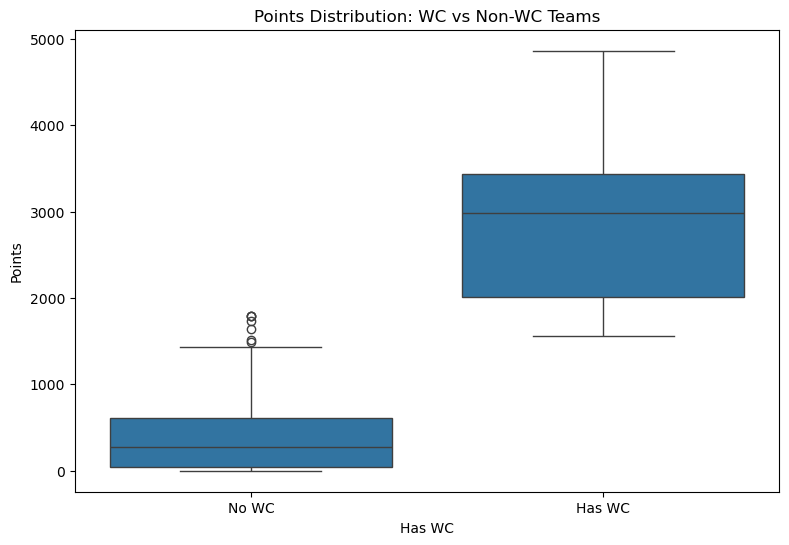

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Points comparison
plt.subplot(1, 2, 1)
sns.boxplot(x='Has WC', y='Points', data=all_drivers)
plt.xticks([0, 1], ['No WC', 'Has WC'])
plt.title('Points Distribution: WC vs Non-WC Teams')

plt.show()


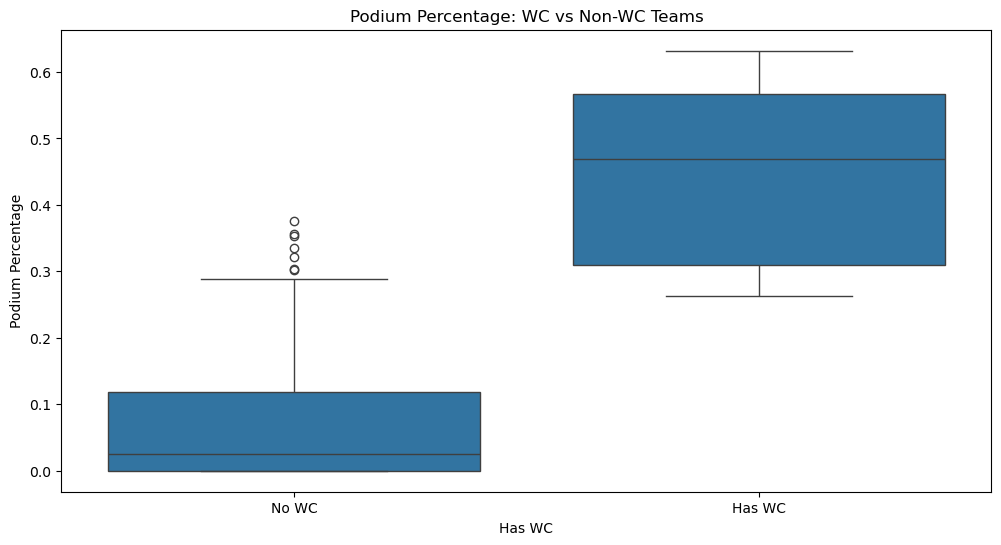

In [23]:
plt.figure(figsize=(12, 6))

# Podium Percentage comparison
sns.boxplot(x='Has WC', y='Podium Percentage', data=all_drivers)
plt.xticks([0, 1], ['No WC', 'Has WC'])
plt.title('Podium Percentage: WC vs Non-WC Teams')

#plt.tight_layout()
plt.show()